In [2]:
import pandas as pd
import numpy as np
from scipy.special import ndtri
import matplotlib.pyplot as plt  

In [20]:
df = pd.read_excel(r'/home/pragya/fyp/abc_1.xlsx')
df.head()

,Unnamed: 0,year,month,date,so2,no2,rspm,spm
0,0,2008,1,1,4.000000,36.500000,131.000000,388.000000
1,1,2008,1,2,4.948598,47.769626,249.912281,464.264151
2,2,2008,1,3,4.948598,47.769626,249.912281,464.264151
3,3,2008,1,4,4.000000,40.700000,164.000000,458.000000
4,4,2008,1,5,4.948598,47.769626,249.912281,464.264151


In [21]:
df = df.sort_values(by=['so2'],ascending=True).reset_index()

In [22]:
df['count'] = df.index + 1

In [23]:
df.head()

,index,Unnamed: 0,year,month,date,so2,no2,rspm,spm,count
0,0,0,2008,1,1,4.0,36.5,131.000000,388.0,1
1,960,960,2010,8,18,4.0,27.0,249.912281,170.0,2
2,965,965,2010,8,23,4.0,34.0,249.912281,199.0,3
3,1023,1023,2010,10,20,4.0,53.0,139.000000,284.0,4
4,968,968,2010,8,26,4.0,42.0,249.912281,283.0,5


df2.head()

In [24]:
n_rows = df.shape[0]

In [7]:
print(n_rows)

1096


In [25]:
df['percentile_area'] = (df['count'])/n_rows

In [26]:
df['z_theoritical'] = ndtri(df['percentile_area'])

In [27]:
df['z_actual'] = (df['so2']-df['so2'].mean())/df['so2'].std(ddof=0)

In [28]:
df.head()

,index,Unnamed: 0,year,month,date,so2,no2,rspm,spm,count,percentile_area,z_theoritical,z_actual
0,0,0,2008,1,1,4.0,36.5,131.000000,388.0,1,0.000912,-3.117355,-2.435717
1,960,960,2010,8,18,4.0,27.0,249.912281,170.0,2,0.001825,-2.906957,-2.435717
2,965,965,2010,8,23,4.0,34.0,249.912281,199.0,3,0.002737,-2.777704,-2.435717
3,1023,1023,2010,10,20,4.0,53.0,139.000000,284.0,4,0.003650,-2.682873,-2.435717
4,968,968,2010,8,26,4.0,42.0,249.912281,283.0,5,0.004562,-2.607369,-2.435717


In [5]:
df2 = pd.read_excel(r'/home/pragya/fyp/abc_median.xlsx')

df2 = df2.sort_values(by=['so2'],ascending=True).reset_index()

df2['count2'] = df2.index + 1

n_rows2 = df2.shape[0]

df2['percentile_area2'] = (df2['count2'])/n_rows2

df2['z_theoritical2'] = ndtri(df2['percentile_area2'])

df2['z_actual2'] = (df2['so2']-df2['so2'].mean())/df2['so2'].std(ddof=0)

df2.head()

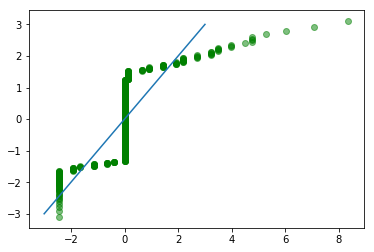

In [32]:
plt.scatter(df.z_actual, df.z_theoritical,c='g',alpha = 0.5)
plt.plot([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3])

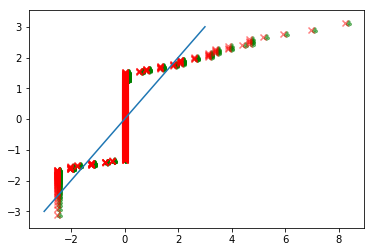

In [33]:
plt.scatter(df.z_actual, df.z_theoritical, c="g",alpha = 0.5, marker=r'$\clubsuit$',label="Mean")
plt.scatter(df2.z_actual2, df2.z_theoritical2, c="r", alpha = 0.5, marker='x',label="Median")
plt.plot([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3])